In [58]:
import pandas as pd
import numpy as np
import math
import tensorflow
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten,Dense,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau

In [59]:
(X, y), (X_test, y_test) = cifar10.load_data()

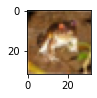

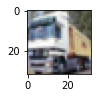

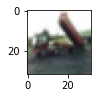

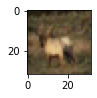

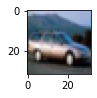

In [60]:
#plotting
from matplotlib import pyplot
for i in range(5):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [61]:
#shape of dataset
print('X_train: ' + str(X.shape))
print('Y_train: ' + str(y.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


In [62]:
X = X.reshape(X.shape[0], 32,32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

Reshaping the inputs

In [63]:
X = X.astype('float32')
X_test = X_test.astype('float32')

In [64]:
train_data_mean = np.mean(X,axis=0)
for i in range (X.shape[0]):
    X[i,:] -= train_data_mean
    
for i in range (X_test.shape[0]):
    X_test[i,:] -= train_data_mean

In [65]:
# Normalizing the Input space
train_data_dev = np.std(X,axis=0)
for i in range (X.shape[0]):
    X[i,:] /= train_data_dev 
    
for i in range (X_test.shape[0]):
    X_test[i,:] /= train_data_dev 

One Hot Encoding The Output

In [66]:
y = to_categorical(y, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [67]:
class Lenet():
  def build(self):
    model = Sequential()
    model.add(Conv2D(filters= 32, kernel_size=5, activation="relu", input_shape=(32, 32, 3)))
    model.add(MaxPool2D(pool_size=(2, 2), strides= (2, 2)))
    model.add(Conv2D(filters= 64, kernel_size=5, activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides= (2, 2)))
    model.add(Conv2D(filters= 120, kernel_size=5, activation="relu"))
    model.add(Flatten())
    model.add(Dense(84, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    self.model = model

  def re_intialize(self):
    self.build()

  def summary(self):
    self.model.summary()

  def fit(self, X, y, Epochs, lr, batch, x_val=None, y_val= None ):
    adam=tensorflow.keras.optimizers.Adam(learning_rate= lr,beta_1 =0.9)
    reduce_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.2, min_lr=1e-6)

    self.model.compile(optimizer= adam,loss='categorical_crossentropy',metrics=['accuracy'])
    self.model.fit(X,y,epochs=Epochs,validation_data=(x_val,y_val),batch_size = batch,callbacks=[reduce_lr])

  def evaluate(self,x_val,y_val):
        loss,accuracy = self.model.evaluate(x_val,y_val)
        return (loss,accuracy)

In [68]:
LeNet = Lenet()
LeNet.build()
LeNet.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 1, 1, 120)         192120    
                                                                 
 flatten_24 (Flatten)        (None, 120)             

1. What is the effect of learning rate on the training process? Which performed best? 

In [69]:
learning_rate=[0.001,0.0005,0.0001]
loss = []
accuracy = []
LeNet = Lenet()
LeNet.build()
for lr in learning_rate:
    LeNet.re_intialize()
    LeNet.fit(X,y, Epochs= 25,lr= lr, batch= int(X.shape[0]/50),x_val= X_test,y_val=y_test)
    l,a = LeNet.evaluate(X_test,y_test)
    loss.append(l)
    accuracy.append(a)

Epoch 1/25
49/50 [============================>.] - ETA: 0s - loss: 1.8169 - accuracy: 0.3409

50/50 [==============================] - 3s 42ms/step - loss: 1.8109 - accuracy: 0.3430 - val_loss: 1.5325 - val_accuracy: 0.4418 - lr: 0.0010
Epoch 2/25
49/50 [============================>.] - ETA: 0s - loss: 1.4369 - accuracy: 0.4840

50/50 [==============================] - 2s 35ms/step - loss: 1.4352 - accuracy: 0.4848 - val_loss: 1.3611 - val_accuracy: 0.5097 - lr: 0.0010
Epoch 3/25
49/50 [============================>.] - ETA: 0s - loss: 1.2982 - accuracy: 0.5364

50/50 [==============================] - 2s 35ms/step - loss: 1.2971 - accuracy: 0.5371 - val_loss: 1.2485 - val_accuracy: 0.5534 - lr: 0.0010
Epoch 4/25
49/50 [============================>.] - ETA: 0s - loss: 1.1801 - accuracy: 0.5823

50/50 [==============================] - 2s 35ms/step - loss: 1.1780 - accuracy: 0.5829 - val_loss: 1.1714 - val_accuracy: 0.5866 - lr: 0.0010
Epoch 5/25
49/50 [============================>.] - ETA: 0s - loss: 1.0955 - accuracy: 0.6152

50/50 [==============================] - 2s 35ms/step - loss: 1.0951 - accuracy: 0.6154 - val_loss: 1.0937 - val_accuracy: 0.6198 - lr: 0.0010
Epoch 6/25
49/50 [============================>.] - ETA: 0s - loss: 1.0209 - accuracy: 0.6437

50/50 [==============================] - 2s 35ms/step - loss: 1.0210 - accuracy: 0.6432 - val_loss: 1.0446 - val_accuracy: 0.6338 - lr: 0.0010
Epoch 7/25
49/50 [============================>.] - ETA: 0s - loss: 0.9692 - accuracy: 0.6616

50/50 [==============================] - 2s 36ms/step - loss: 0.9688 - accuracy: 0.6619 - val_loss: 1.0379 - val_accuracy: 0.6404 - lr: 0.0010
Epoch 8/25
49/50 [============================>.] - ETA: 0s - loss: 0.9261 - accuracy: 0.6796

50/50 [==============================] - 2s 35ms/step - loss: 0.9251 - accuracy: 0.6799 - val_loss: 0.9701 - val_accuracy: 0.6620 - lr: 0.0010
Epoch 9/25
49/50 [============================>.] - ETA: 0s - loss: 0.8947 - accuracy: 0.6891

50/50 [==============================] - 2s 35ms/step - loss: 0.8936 - accuracy: 0.6897 - val_loss: 0.9659 - val_accuracy: 0.6686 - lr: 0.0010
Epoch 10/25
49/50 [============================>.] - ETA: 0s - loss: 0.8487 - accuracy: 0.7061

50/50 [==============================] - 2s 35ms/step - loss: 0.8474 - accuracy: 0.7068 - val_loss: 0.9352 - val_accuracy: 0.6811 - lr: 0.0010
Epoch 11/25
49/50 [============================>.] - ETA: 0s - loss: 0.8020 - accuracy: 0.7236

50/50 [==============================] - 2s 36ms/step - loss: 0.8021 - accuracy: 0.7233 - val_loss: 0.9156 - val_accuracy: 0.6866 - lr: 0.0010
Epoch 12/25
49/50 [============================>.] - ETA: 0s - loss: 0.7780 - accuracy: 0.7306

50/50 [==============================] - 2s 35ms/step - loss: 0.7770 - accuracy: 0.7309 - val_loss: 0.9076 - val_accuracy: 0.6909 - lr: 0.0010
Epoch 13/25
49/50 [============================>.] - ETA: 0s - loss: 0.7506 - accuracy: 0.7396

50/50 [==============================] - 2s 35ms/step - loss: 0.7501 - accuracy: 0.7398 - val_loss: 0.8897 - val_accuracy: 0.7004 - lr: 0.0010
Epoch 14/25
49/50 [============================>.] - ETA: 0s - loss: 0.7185 - accuracy: 0.7513

50/50 [==============================] - 2s 36ms/step - loss: 0.7195 - accuracy: 0.7511 - val_loss: 0.9177 - val_accuracy: 0.6912 - lr: 0.0010
Epoch 15/25
49/50 [============================>.] - ETA: 0s - loss: 0.7044 - accuracy: 0.7558

50/50 [==============================] - 2s 36ms/step - loss: 0.7041 - accuracy: 0.7557 - val_loss: 0.8857 - val_accuracy: 0.6968 - lr: 0.0010
Epoch 16/25
49/50 [============================>.] - ETA: 0s - loss: 0.6738 - accuracy: 0.7664

50/50 [==============================] - 2s 36ms/step - loss: 0.6743 - accuracy: 0.7662 - val_loss: 0.8896 - val_accuracy: 0.6997 - lr: 0.0010
Epoch 17/25
49/50 [============================>.] - ETA: 0s - loss: 0.6534 - accuracy: 0.7751

50/50 [==============================] - 2s 35ms/step - loss: 0.6527 - accuracy: 0.7754 - val_loss: 0.8946 - val_accuracy: 0.7020 - lr: 0.0010
Epoch 18/25
49/50 [============================>.] - ETA: 0s - loss: 0.6293 - accuracy: 0.7834

50/50 [==============================] - 2s 36ms/step - loss: 0.6296 - accuracy: 0.7832 - val_loss: 0.9354 - val_accuracy: 0.6901 - lr: 0.0010
Epoch 19/25
49/50 [============================>.] - ETA: 0s - loss: 0.6119 - accuracy: 0.7886

50/50 [==============================] - 2s 36ms/step - loss: 0.6126 - accuracy: 0.7883 - val_loss: 0.8742 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 20/25
49/50 [============================>.] - ETA: 0s - loss: 0.5814 - accuracy: 0.7982

50/50 [==============================] - 2s 35ms/step - loss: 0.5817 - accuracy: 0.7982 - val_loss: 0.8869 - val_accuracy: 0.7082 - lr: 0.0010
Epoch 21/25
49/50 [============================>.] - ETA: 0s - loss: 0.5519 - accuracy: 0.8098

50/50 [==============================] - 2s 36ms/step - loss: 0.5520 - accuracy: 0.8098 - val_loss: 0.9321 - val_accuracy: 0.6968 - lr: 0.0010
Epoch 22/25
49/50 [============================>.] - ETA: 0s - loss: 0.5446 - accuracy: 0.8116

50/50 [==============================] - 2s 36ms/step - loss: 0.5465 - accuracy: 0.8106 - val_loss: 0.8922 - val_accuracy: 0.7081 - lr: 0.0010
Epoch 23/25
49/50 [============================>.] - ETA: 0s - loss: 0.5147 - accuracy: 0.8246

50/50 [==============================] - 2s 35ms/step - loss: 0.5152 - accuracy: 0.8239 - val_loss: 0.8928 - val_accuracy: 0.7158 - lr: 0.0010
Epoch 24/25
49/50 [============================>.] - ETA: 0s - loss: 0.4913 - accuracy: 0.8309

50/50 [==============================] - 2s 35ms/step - loss: 0.4912 - accuracy: 0.8308 - val_loss: 0.9026 - val_accuracy: 0.7092 - lr: 0.0010
Epoch 25/25
49/50 [============================>.] - ETA: 0s - loss: 0.4838 - accuracy: 0.8327

313/313 [==============================] - 1s 3ms/step - loss: 0.9262 - accuracy: 0.7115
Epoch 1/25
49/50 [============================>.] - ETA: 0s - loss: 1.8212 - accuracy: 0.3436

50/50 [==============================] - 3s 42ms/step - loss: 1.8163 - accuracy: 0.3452 - val_loss: 1.5776 - val_accuracy: 0.4308 - lr: 5.0000e-04
Epoch 2/25
49/50 [============================>.] - ETA: 0s - loss: 1.4726 - accuracy: 0.4727

50/50 [==============================] - 2s 36ms/step - loss: 1.4718 - accuracy: 0.4731 - val_loss: 1.3849 - val_accuracy: 0.5056 - lr: 5.0000e-04
Epoch 3/25
49/50 [============================>.] - ETA: 0s - loss: 1.3420 - accuracy: 0.5237

50/50 [==============================] - 2s 35ms/step - loss: 1.3414 - accuracy: 0.5239 - val_loss: 1.2966 - val_accuracy: 0.5367 - lr: 5.0000e-04
Epoch 4/25
49/50 [============================>.] - ETA: 0s - loss: 1.2462 - accuracy: 0.5599

50/50 [==============================] - 2s 36ms/step - loss: 1.2452 - accuracy: 0.5603 - val_loss: 1.2351 - val_accuracy: 0.5612 - lr: 5.0000e-04
Epoch 5/25
49/50 [============================>.] - ETA: 0s - loss: 1.1770 - accuracy: 0.5869

50/50 [==============================] - 2s 36ms/step - loss: 1.1760 - accuracy: 0.5870 - val_loss: 1.1645 - val_accuracy: 0.5880 - lr: 5.0000e-04
Epoch 6/25
49/50 [============================>.] - ETA: 0s - loss: 1.1058 - accuracy: 0.6134

50/50 [==============================] - 2s 35ms/step - loss: 1.1047 - accuracy: 0.6139 - val_loss: 1.1094 - val_accuracy: 0.6093 - lr: 5.0000e-04
Epoch 7/25
49/50 [============================>.] - ETA: 0s - loss: 1.0500 - accuracy: 0.6375

50/50 [==============================] - 2s 35ms/step - loss: 1.0488 - accuracy: 0.6382 - val_loss: 1.0688 - val_accuracy: 0.6271 - lr: 5.0000e-04
Epoch 8/25
49/50 [============================>.] - ETA: 0s - loss: 1.0053 - accuracy: 0.6531

50/50 [==============================] - 2s 35ms/step - loss: 1.0060 - accuracy: 0.6528 - val_loss: 1.0306 - val_accuracy: 0.6418 - lr: 5.0000e-04
Epoch 9/25
49/50 [============================>.] - ETA: 0s - loss: 0.9682 - accuracy: 0.6651

50/50 [==============================] - 2s 36ms/step - loss: 0.9671 - accuracy: 0.6653 - val_loss: 1.0338 - val_accuracy: 0.6369 - lr: 5.0000e-04
Epoch 10/25
49/50 [============================>.] - ETA: 0s - loss: 0.9448 - accuracy: 0.6736

50/50 [==============================] - 2s 36ms/step - loss: 0.9442 - accuracy: 0.6735 - val_loss: 0.9910 - val_accuracy: 0.6565 - lr: 5.0000e-04
Epoch 11/25
49/50 [============================>.] - ETA: 0s - loss: 0.9147 - accuracy: 0.6846

50/50 [==============================] - 2s 35ms/step - loss: 0.9161 - accuracy: 0.6840 - val_loss: 0.9802 - val_accuracy: 0.6580 - lr: 5.0000e-04
Epoch 12/25
49/50 [============================>.] - ETA: 0s - loss: 0.8821 - accuracy: 0.6971

50/50 [==============================] - 2s 35ms/step - loss: 0.8823 - accuracy: 0.6970 - val_loss: 0.9656 - val_accuracy: 0.6643 - lr: 5.0000e-04
Epoch 13/25
49/50 [============================>.] - ETA: 0s - loss: 0.8608 - accuracy: 0.7041

50/50 [==============================] - 2s 35ms/step - loss: 0.8598 - accuracy: 0.7043 - val_loss: 0.9518 - val_accuracy: 0.6717 - lr: 5.0000e-04
Epoch 14/25
49/50 [============================>.] - ETA: 0s - loss: 0.8365 - accuracy: 0.7128

50/50 [==============================] - 2s 36ms/step - loss: 0.8381 - accuracy: 0.7121 - val_loss: 0.9351 - val_accuracy: 0.6779 - lr: 5.0000e-04
Epoch 15/25
49/50 [============================>.] - ETA: 0s - loss: 0.8180 - accuracy: 0.7191

50/50 [==============================] - 2s 35ms/step - loss: 0.8177 - accuracy: 0.7192 - val_loss: 0.9180 - val_accuracy: 0.6820 - lr: 5.0000e-04
Epoch 16/25
49/50 [============================>.] - ETA: 0s - loss: 0.7920 - accuracy: 0.7282

50/50 [==============================] - 2s 35ms/step - loss: 0.7917 - accuracy: 0.7282 - val_loss: 0.9259 - val_accuracy: 0.6802 - lr: 5.0000e-04
Epoch 17/25
49/50 [============================>.] - ETA: 0s - loss: 0.7778 - accuracy: 0.7321

50/50 [==============================] - 2s 36ms/step - loss: 0.7787 - accuracy: 0.7324 - val_loss: 0.9055 - val_accuracy: 0.6851 - lr: 5.0000e-04
Epoch 18/25
49/50 [============================>.] - ETA: 0s - loss: 0.7661 - accuracy: 0.7357

50/50 [==============================] - 2s 35ms/step - loss: 0.7667 - accuracy: 0.7353 - val_loss: 0.9410 - val_accuracy: 0.6700 - lr: 5.0000e-04
Epoch 19/25
49/50 [============================>.] - ETA: 0s - loss: 0.7419 - accuracy: 0.7454

50/50 [==============================] - 2s 35ms/step - loss: 0.7422 - accuracy: 0.7450 - val_loss: 0.9063 - val_accuracy: 0.6897 - lr: 5.0000e-04
Epoch 20/25
49/50 [============================>.] - ETA: 0s - loss: 0.7212 - accuracy: 0.7524

50/50 [==============================] - 2s 36ms/step - loss: 0.7217 - accuracy: 0.7524 - val_loss: 0.9468 - val_accuracy: 0.6758 - lr: 5.0000e-04
Epoch 21/25
49/50 [============================>.] - ETA: 0s - loss: 0.7127 - accuracy: 0.7548

50/50 [==============================] - 2s 39ms/step - loss: 0.7125 - accuracy: 0.7547 - val_loss: 0.8955 - val_accuracy: 0.6940 - lr: 5.0000e-04
Epoch 22/25
49/50 [============================>.] - ETA: 0s - loss: 0.6905 - accuracy: 0.7639

50/50 [==============================] - 2s 36ms/step - loss: 0.6902 - accuracy: 0.7639 - val_loss: 0.8823 - val_accuracy: 0.6987 - lr: 5.0000e-04
Epoch 23/25
49/50 [============================>.] - ETA: 0s - loss: 0.6786 - accuracy: 0.7663

50/50 [==============================] - 2s 35ms/step - loss: 0.6777 - accuracy: 0.7666 - val_loss: 0.9031 - val_accuracy: 0.6921 - lr: 5.0000e-04
Epoch 24/25
49/50 [============================>.] - ETA: 0s - loss: 0.6579 - accuracy: 0.7731

50/50 [==============================] - 2s 36ms/step - loss: 0.6590 - accuracy: 0.7726 - val_loss: 0.9005 - val_accuracy: 0.6959 - lr: 5.0000e-04
Epoch 25/25
49/50 [============================>.] - ETA: 0s - loss: 0.6420 - accuracy: 0.7788

313/313 [==============================] - 1s 3ms/step - loss: 0.8961 - accuracy: 0.6944
Epoch 1/25
49/50 [============================>.] - ETA: 0s - loss: 2.0923 - accuracy: 0.2461

50/50 [==============================] - 3s 42ms/step - loss: 2.0883 - accuracy: 0.2478 - val_loss: 1.8733 - val_accuracy: 0.3299 - lr: 1.0000e-04
Epoch 2/25
49/50 [============================>.] - ETA: 0s - loss: 1.7803 - accuracy: 0.3616

50/50 [==============================] - 2s 35ms/step - loss: 1.7786 - accuracy: 0.3625 - val_loss: 1.6880 - val_accuracy: 0.3951 - lr: 1.0000e-04
Epoch 3/25
49/50 [============================>.] - ETA: 0s - loss: 1.6308 - accuracy: 0.4156

50/50 [==============================] - 2s 35ms/step - loss: 1.6310 - accuracy: 0.4153 - val_loss: 1.5813 - val_accuracy: 0.4336 - lr: 1.0000e-04
Epoch 4/25
49/50 [============================>.] - ETA: 0s - loss: 1.5377 - accuracy: 0.4495

50/50 [==============================] - 2s 35ms/step - loss: 1.5367 - accuracy: 0.4497 - val_loss: 1.5050 - val_accuracy: 0.4611 - lr: 1.0000e-04
Epoch 5/25
49/50 [============================>.] - ETA: 0s - loss: 1.4682 - accuracy: 0.4786

50/50 [==============================] - 2s 36ms/step - loss: 1.4681 - accuracy: 0.4782 - val_loss: 1.4530 - val_accuracy: 0.4841 - lr: 1.0000e-04
Epoch 6/25
49/50 [============================>.] - ETA: 0s - loss: 1.4165 - accuracy: 0.4968

50/50 [==============================] - 2s 35ms/step - loss: 1.4169 - accuracy: 0.4965 - val_loss: 1.4114 - val_accuracy: 0.4987 - lr: 1.0000e-04
Epoch 7/25
49/50 [============================>.] - ETA: 0s - loss: 1.3752 - accuracy: 0.5136

50/50 [==============================] - 2s 36ms/step - loss: 1.3759 - accuracy: 0.5133 - val_loss: 1.3760 - val_accuracy: 0.5040 - lr: 1.0000e-04
Epoch 8/25
49/50 [============================>.] - ETA: 0s - loss: 1.3396 - accuracy: 0.5265

50/50 [==============================] - 2s 35ms/step - loss: 1.3375 - accuracy: 0.5270 - val_loss: 1.3446 - val_accuracy: 0.5208 - lr: 1.0000e-04
Epoch 9/25
49/50 [============================>.] - ETA: 0s - loss: 1.3050 - accuracy: 0.5395

50/50 [==============================] - 2s 35ms/step - loss: 1.3052 - accuracy: 0.5396 - val_loss: 1.3085 - val_accuracy: 0.5372 - lr: 1.0000e-04
Epoch 10/25
49/50 [============================>.] - ETA: 0s - loss: 1.2780 - accuracy: 0.5507

50/50 [==============================] - 2s 36ms/step - loss: 1.2786 - accuracy: 0.5505 - val_loss: 1.2860 - val_accuracy: 0.5422 - lr: 1.0000e-04
Epoch 11/25
49/50 [============================>.] - ETA: 0s - loss: 1.2515 - accuracy: 0.5603

50/50 [==============================] - 2s 36ms/step - loss: 1.2507 - accuracy: 0.5610 - val_loss: 1.2646 - val_accuracy: 0.5505 - lr: 1.0000e-04
Epoch 12/25
49/50 [============================>.] - ETA: 0s - loss: 1.2279 - accuracy: 0.5687

50/50 [==============================] - 2s 36ms/step - loss: 1.2272 - accuracy: 0.5690 - val_loss: 1.2406 - val_accuracy: 0.5640 - lr: 1.0000e-04
Epoch 13/25
49/50 [============================>.] - ETA: 0s - loss: 1.2073 - accuracy: 0.5786

50/50 [==============================] - 2s 36ms/step - loss: 1.2072 - accuracy: 0.5786 - val_loss: 1.2204 - val_accuracy: 0.5696 - lr: 1.0000e-04
Epoch 14/25
49/50 [============================>.] - ETA: 0s - loss: 1.1851 - accuracy: 0.5862

50/50 [==============================] - 2s 36ms/step - loss: 1.1846 - accuracy: 0.5865 - val_loss: 1.2043 - val_accuracy: 0.5789 - lr: 1.0000e-04
Epoch 15/25
49/50 [============================>.] - ETA: 0s - loss: 1.1708 - accuracy: 0.5912

50/50 [==============================] - 2s 36ms/step - loss: 1.1707 - accuracy: 0.5914 - val_loss: 1.1971 - val_accuracy: 0.5781 - lr: 1.0000e-04
Epoch 16/25
49/50 [============================>.] - ETA: 0s - loss: 1.1541 - accuracy: 0.5974

50/50 [==============================] - 2s 36ms/step - loss: 1.1545 - accuracy: 0.5973 - val_loss: 1.1769 - val_accuracy: 0.5881 - lr: 1.0000e-04
Epoch 17/25
49/50 [============================>.] - ETA: 0s - loss: 1.1340 - accuracy: 0.6059

50/50 [==============================] - 2s 35ms/step - loss: 1.1344 - accuracy: 0.6056 - val_loss: 1.1812 - val_accuracy: 0.5815 - lr: 1.0000e-04
Epoch 18/25
49/50 [============================>.] - ETA: 0s - loss: 1.1212 - accuracy: 0.6094

50/50 [==============================] - 2s 36ms/step - loss: 1.1210 - accuracy: 0.6096 - val_loss: 1.1544 - val_accuracy: 0.5985 - lr: 1.0000e-04
Epoch 19/25
49/50 [============================>.] - ETA: 0s - loss: 1.1059 - accuracy: 0.6151

50/50 [==============================] - 2s 36ms/step - loss: 1.1061 - accuracy: 0.6152 - val_loss: 1.1444 - val_accuracy: 0.6013 - lr: 1.0000e-04
Epoch 20/25
49/50 [============================>.] - ETA: 0s - loss: 1.0962 - accuracy: 0.6195

50/50 [==============================] - 2s 36ms/step - loss: 1.0959 - accuracy: 0.6196 - val_loss: 1.1403 - val_accuracy: 0.5997 - lr: 1.0000e-04
Epoch 21/25
49/50 [============================>.] - ETA: 0s - loss: 1.0846 - accuracy: 0.6219

50/50 [==============================] - 2s 36ms/step - loss: 1.0838 - accuracy: 0.6221 - val_loss: 1.1382 - val_accuracy: 0.6040 - lr: 1.0000e-04
Epoch 22/25
49/50 [============================>.] - ETA: 0s - loss: 1.0674 - accuracy: 0.6292

50/50 [==============================] - 2s 36ms/step - loss: 1.0683 - accuracy: 0.6289 - val_loss: 1.1081 - val_accuracy: 0.6162 - lr: 1.0000e-04
Epoch 23/25
49/50 [============================>.] - ETA: 0s - loss: 1.0567 - accuracy: 0.6323

50/50 [==============================] - 2s 36ms/step - loss: 1.0561 - accuracy: 0.6326 - val_loss: 1.1046 - val_accuracy: 0.6146 - lr: 1.0000e-04
Epoch 24/25
49/50 [============================>.] - ETA: 0s - loss: 1.0435 - accuracy: 0.6404

50/50 [==============================] - 2s 35ms/step - loss: 1.0440 - accuracy: 0.6399 - val_loss: 1.0958 - val_accuracy: 0.6183 - lr: 1.0000e-04
Epoch 25/25
49/50 [============================>.] - ETA: 0s - loss: 1.0369 - accuracy: 0.6414

313/313 [==============================] - 1s 3ms/step - loss: 1.0998 - accuracy: 0.6196


In [70]:
df = pd.DataFrame([])
df['Learning_Rates'] = learning_rate
df['Loss'] = loss
df['Accuracy'] = accuracy

In [71]:
df

,Learning_Rates,Loss,Accuracy
0,0.0010,0.926174,0.7115
1,0.0005,0.896077,0.6944
2,0.0001,1.099826,0.6196


We can see that highest accuracy is acheived for the learning rate 0.0010 that is 0.7055

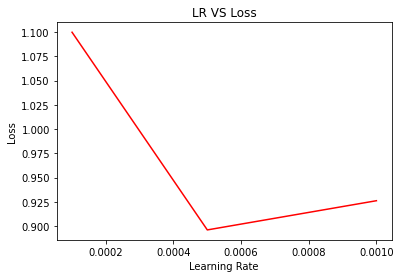

In [72]:
import matplotlib.pyplot as plt

plt.plot(learning_rate,loss,'r')
plt.title("LR VS Loss")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.show()

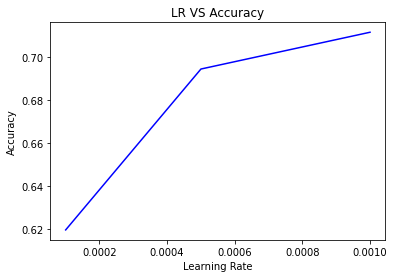

In [73]:
plt.plot(learning_rate,accuracy,'b')
plt.title("LR VS Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.show()

2. What is the effect of batch size on the training process? Which performed best?

In [74]:
batches = [500,1000,5000,10000]
loss = []
accuracy = []
Net = Lenet()
Net.build()
for bat in batches:
    Net.re_intialize()
    Net.fit(X,y,Epochs= 25,lr= 0.005, batch= bat,x_val= X_test,y_val=y_test)
    l,a = Net.evaluate(X_test,y_test)
    loss.append(l)
    accuracy.append(a)

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 1.6514 - accuracy: 0.3968

100/100 [==============================] - 3s 26ms/step - loss: 1.6514 - accuracy: 0.3968 - val_loss: 1.3746 - val_accuracy: 0.4993 - lr: 0.0050
Epoch 2/25
 99/100 [============================>.] - ETA: 0s - loss: 1.2604 - accuracy: 0.5480

100/100 [==============================] - 2s 24ms/step - loss: 1.2592 - accuracy: 0.5482 - val_loss: 1.1864 - val_accuracy: 0.5745 - lr: 0.0050
Epoch 3/25
 98/100 [============================>.] - ETA: 0s - loss: 1.1306 - accuracy: 0.5956

100/100 [==============================] - 2s 20ms/step - loss: 1.1300 - accuracy: 0.5959 - val_loss: 1.1303 - val_accuracy: 0.6031 - lr: 0.0050
Epoch 4/25
 98/100 [============================>.] - ETA: 0s - loss: 1.0298 - accuracy: 0.6339

100/100 [==============================] - 2s 19ms/step - loss: 1.0294 - accuracy: 0.6339 - val_loss: 1.0937 - val_accuracy: 0.6152 - lr: 0.0050
Epoch 5/25
100/100 [==============================] - ETA: 0s - loss: 0.9842 - accuracy: 0.6517

100/100 [==============================] - 2s 19ms/step - loss: 0.9842 - accuracy: 0.6517 - val_loss: 1.0064 - val_accuracy: 0.6461 - lr: 0.0050
Epoch 6/25
 98/100 [============================>.] - ETA: 0s - loss: 0.9330 - accuracy: 0.6699

100/100 [==============================] - 2s 19ms/step - loss: 0.9319 - accuracy: 0.6701 - val_loss: 1.0089 - val_accuracy: 0.6494 - lr: 0.0050
Epoch 7/25
 99/100 [============================>.] - ETA: 0s - loss: 0.8894 - accuracy: 0.6837

100/100 [==============================] - 2s 19ms/step - loss: 0.8885 - accuracy: 0.6840 - val_loss: 1.0191 - val_accuracy: 0.6515 - lr: 0.0050
Epoch 8/25
100/100 [==============================] - ETA: 0s - loss: 0.8521 - accuracy: 0.6979

100/100 [==============================] - 2s 19ms/step - loss: 0.8521 - accuracy: 0.6979 - val_loss: 0.9921 - val_accuracy: 0.6616 - lr: 0.0050
Epoch 9/25
 98/100 [============================>.] - ETA: 0s - loss: 0.8269 - accuracy: 0.7075

100/100 [==============================] - 2s 19ms/step - loss: 0.8277 - accuracy: 0.7073 - val_loss: 1.0324 - val_accuracy: 0.6505 - lr: 0.0050
Epoch 10/25
 98/100 [============================>.] - ETA: 0s - loss: 0.7952 - accuracy: 0.7166

100/100 [==============================] - 2s 19ms/step - loss: 0.7969 - accuracy: 0.7159 - val_loss: 1.0136 - val_accuracy: 0.6559 - lr: 0.0050
Epoch 11/25
100/100 [==============================] - ETA: 0s - loss: 0.7646 - accuracy: 0.7267

100/100 [==============================] - 2s 19ms/step - loss: 0.7646 - accuracy: 0.7267 - val_loss: 1.0049 - val_accuracy: 0.6645 - lr: 0.0050
Epoch 12/25
 98/100 [============================>.] - ETA: 0s - loss: 0.7420 - accuracy: 0.7342

100/100 [==============================] - 2s 19ms/step - loss: 0.7421 - accuracy: 0.7345 - val_loss: 1.0060 - val_accuracy: 0.6676 - lr: 0.0050
Epoch 13/25
 99/100 [============================>.] - ETA: 0s - loss: 0.7252 - accuracy: 0.7423

100/100 [==============================] - 2s 19ms/step - loss: 0.7258 - accuracy: 0.7425 - val_loss: 0.9910 - val_accuracy: 0.6655 - lr: 0.0050
Epoch 14/25
100/100 [==============================] - ETA: 0s - loss: 0.7213 - accuracy: 0.7429

100/100 [==============================] - 2s 19ms/step - loss: 0.7213 - accuracy: 0.7429 - val_loss: 0.9999 - val_accuracy: 0.6674 - lr: 0.0050
Epoch 15/25
 98/100 [============================>.] - ETA: 0s - loss: 0.6892 - accuracy: 0.7541

100/100 [==============================] - 2s 19ms/step - loss: 0.6899 - accuracy: 0.7538 - val_loss: 1.0044 - val_accuracy: 0.6684 - lr: 0.0050
Epoch 16/25
 99/100 [============================>.] - ETA: 0s - loss: 0.6746 - accuracy: 0.7580

100/100 [==============================] - 2s 19ms/step - loss: 0.6744 - accuracy: 0.7583 - val_loss: 1.0628 - val_accuracy: 0.6653 - lr: 0.0050
Epoch 17/25
 98/100 [============================>.] - ETA: 0s - loss: 0.6833 - accuracy: 0.7570

100/100 [==============================] - 2s 19ms/step - loss: 0.6836 - accuracy: 0.7568 - val_loss: 1.0723 - val_accuracy: 0.6591 - lr: 0.0050
Epoch 18/25
 98/100 [============================>.] - ETA: 0s - loss: 0.6616 - accuracy: 0.7628

100/100 [==============================] - 2s 19ms/step - loss: 0.6640 - accuracy: 0.7619 - val_loss: 1.0639 - val_accuracy: 0.6612 - lr: 0.0050
Epoch 19/25
 98/100 [============================>.] - ETA: 0s - loss: 0.6445 - accuracy: 0.7708

100/100 [==============================] - 2s 21ms/step - loss: 0.6455 - accuracy: 0.7706 - val_loss: 1.0451 - val_accuracy: 0.6698 - lr: 0.0050
Epoch 20/25
100/100 [==============================] - ETA: 0s - loss: 0.6305 - accuracy: 0.7749

100/100 [==============================] - 2s 19ms/step - loss: 0.6305 - accuracy: 0.7749 - val_loss: 1.0853 - val_accuracy: 0.6685 - lr: 0.0050
Epoch 21/25
100/100 [==============================] - ETA: 0s - loss: 0.6290 - accuracy: 0.7744

100/100 [==============================] - 2s 19ms/step - loss: 0.6290 - accuracy: 0.7744 - val_loss: 1.0626 - val_accuracy: 0.6699 - lr: 0.0050
Epoch 22/25
 99/100 [============================>.] - ETA: 0s - loss: 0.6035 - accuracy: 0.7846

100/100 [==============================] - 2s 19ms/step - loss: 0.6036 - accuracy: 0.7846 - val_loss: 1.0882 - val_accuracy: 0.6680 - lr: 0.0050
Epoch 23/25
 98/100 [============================>.] - ETA: 0s - loss: 0.5918 - accuracy: 0.7883

100/100 [==============================] - 2s 19ms/step - loss: 0.5932 - accuracy: 0.7880 - val_loss: 1.0700 - val_accuracy: 0.6667 - lr: 0.0050
Epoch 24/25
100/100 [==============================] - ETA: 0s - loss: 0.5851 - accuracy: 0.7904

100/100 [==============================] - 2s 19ms/step - loss: 0.5851 - accuracy: 0.7904 - val_loss: 1.1751 - val_accuracy: 0.6485 - lr: 0.0050
Epoch 25/25
 98/100 [============================>.] - ETA: 0s - loss: 0.5890 - accuracy: 0.7882

313/313 [==============================] - 1s 3ms/step - loss: 1.1425 - accuracy: 0.6565
Epoch 1/25
49/50 [============================>.] - ETA: 0s - loss: 1.8445 - accuracy: 0.3212

50/50 [==============================] - 3s 42ms/step - loss: 1.8382 - accuracy: 0.3236 - val_loss: 1.5167 - val_accuracy: 0.4487 - lr: 0.0050
Epoch 2/25
49/50 [============================>.] - ETA: 0s - loss: 1.4296 - accuracy: 0.4793

50/50 [==============================] - 2s 35ms/step - loss: 1.4279 - accuracy: 0.4798 - val_loss: 1.3755 - val_accuracy: 0.5003 - lr: 0.0050
Epoch 3/25
49/50 [============================>.] - ETA: 0s - loss: 1.3000 - accuracy: 0.5321

50/50 [==============================] - 2s 35ms/step - loss: 1.3008 - accuracy: 0.5318 - val_loss: 1.3071 - val_accuracy: 0.5305 - lr: 0.0050
Epoch 4/25
49/50 [============================>.] - ETA: 0s - loss: 1.2117 - accuracy: 0.5654

50/50 [==============================] - 2s 34ms/step - loss: 1.2111 - accuracy: 0.5658 - val_loss: 1.1913 - val_accuracy: 0.5691 - lr: 0.0050
Epoch 5/25
49/50 [============================>.] - ETA: 0s - loss: 1.1299 - accuracy: 0.5969

50/50 [==============================] - 2s 35ms/step - loss: 1.1297 - accuracy: 0.5973 - val_loss: 1.1360 - val_accuracy: 0.5965 - lr: 0.0050
Epoch 6/25
49/50 [============================>.] - ETA: 0s - loss: 1.0679 - accuracy: 0.6220

50/50 [==============================] - 2s 35ms/step - loss: 1.0692 - accuracy: 0.6215 - val_loss: 1.1347 - val_accuracy: 0.5954 - lr: 0.0050
Epoch 7/25
49/50 [============================>.] - ETA: 0s - loss: 1.0218 - accuracy: 0.6402

50/50 [==============================] - 2s 35ms/step - loss: 1.0213 - accuracy: 0.6401 - val_loss: 1.0363 - val_accuracy: 0.6302 - lr: 0.0050
Epoch 8/25
49/50 [============================>.] - ETA: 0s - loss: 0.9743 - accuracy: 0.6566

50/50 [==============================] - 2s 35ms/step - loss: 0.9743 - accuracy: 0.6563 - val_loss: 1.0433 - val_accuracy: 0.6346 - lr: 0.0050
Epoch 9/25
49/50 [============================>.] - ETA: 0s - loss: 0.9265 - accuracy: 0.6702

50/50 [==============================] - 2s 35ms/step - loss: 0.9254 - accuracy: 0.6709 - val_loss: 1.0003 - val_accuracy: 0.6499 - lr: 0.0050
Epoch 10/25
49/50 [============================>.] - ETA: 0s - loss: 0.8989 - accuracy: 0.6815

50/50 [==============================] - 2s 35ms/step - loss: 0.8989 - accuracy: 0.6813 - val_loss: 0.9748 - val_accuracy: 0.6571 - lr: 0.0050
Epoch 11/25
49/50 [============================>.] - ETA: 0s - loss: 0.8746 - accuracy: 0.6894

50/50 [==============================] - 2s 35ms/step - loss: 0.8752 - accuracy: 0.6892 - val_loss: 1.0274 - val_accuracy: 0.6440 - lr: 0.0050
Epoch 12/25
49/50 [============================>.] - ETA: 0s - loss: 0.8575 - accuracy: 0.6957

50/50 [==============================] - 2s 35ms/step - loss: 0.8591 - accuracy: 0.6952 - val_loss: 0.9944 - val_accuracy: 0.6542 - lr: 0.0050
Epoch 13/25
49/50 [============================>.] - ETA: 0s - loss: 0.8346 - accuracy: 0.7044

50/50 [==============================] - 2s 35ms/step - loss: 0.8351 - accuracy: 0.7040 - val_loss: 0.9737 - val_accuracy: 0.6610 - lr: 0.0050
Epoch 14/25
49/50 [============================>.] - ETA: 0s - loss: 0.8111 - accuracy: 0.7118

50/50 [==============================] - 2s 35ms/step - loss: 0.8115 - accuracy: 0.7116 - val_loss: 0.9797 - val_accuracy: 0.6626 - lr: 0.0050
Epoch 15/25
49/50 [============================>.] - ETA: 0s - loss: 0.8036 - accuracy: 0.7142

50/50 [==============================] - 2s 35ms/step - loss: 0.8040 - accuracy: 0.7143 - val_loss: 0.9887 - val_accuracy: 0.6638 - lr: 0.0050
Epoch 16/25
49/50 [============================>.] - ETA: 0s - loss: 0.7809 - accuracy: 0.7254

50/50 [==============================] - 2s 35ms/step - loss: 0.7817 - accuracy: 0.7253 - val_loss: 1.0117 - val_accuracy: 0.6569 - lr: 0.0050
Epoch 17/25
49/50 [============================>.] - ETA: 0s - loss: 0.7791 - accuracy: 0.7248

50/50 [==============================] - 2s 35ms/step - loss: 0.7801 - accuracy: 0.7244 - val_loss: 0.9710 - val_accuracy: 0.6650 - lr: 0.0050
Epoch 18/25
49/50 [============================>.] - ETA: 0s - loss: 0.7532 - accuracy: 0.7333

50/50 [==============================] - 2s 35ms/step - loss: 0.7533 - accuracy: 0.7334 - val_loss: 0.9721 - val_accuracy: 0.6691 - lr: 0.0050
Epoch 19/25
49/50 [============================>.] - ETA: 0s - loss: 0.7386 - accuracy: 0.7369

50/50 [==============================] - 2s 35ms/step - loss: 0.7389 - accuracy: 0.7368 - val_loss: 0.9652 - val_accuracy: 0.6696 - lr: 0.0050
Epoch 20/25
49/50 [============================>.] - ETA: 0s - loss: 0.7183 - accuracy: 0.7446

50/50 [==============================] - 2s 35ms/step - loss: 0.7203 - accuracy: 0.7443 - val_loss: 0.9724 - val_accuracy: 0.6689 - lr: 0.0050
Epoch 21/25
49/50 [============================>.] - ETA: 0s - loss: 0.7233 - accuracy: 0.7441

50/50 [==============================] - 2s 35ms/step - loss: 0.7229 - accuracy: 0.7444 - val_loss: 0.9673 - val_accuracy: 0.6693 - lr: 0.0050
Epoch 22/25
49/50 [============================>.] - ETA: 0s - loss: 0.7046 - accuracy: 0.7512

50/50 [==============================] - 2s 35ms/step - loss: 0.7050 - accuracy: 0.7512 - val_loss: 0.9687 - val_accuracy: 0.6738 - lr: 0.0050
Epoch 23/25
49/50 [============================>.] - ETA: 0s - loss: 0.6998 - accuracy: 0.7503

50/50 [==============================] - 2s 35ms/step - loss: 0.6993 - accuracy: 0.7505 - val_loss: 0.9769 - val_accuracy: 0.6754 - lr: 0.0050
Epoch 24/25
49/50 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.7531

50/50 [==============================] - 2s 35ms/step - loss: 0.6925 - accuracy: 0.7528 - val_loss: 1.0252 - val_accuracy: 0.6625 - lr: 0.0050
Epoch 25/25
49/50 [============================>.] - ETA: 0s - loss: 0.6780 - accuracy: 0.7585

313/313 [==============================] - 1s 3ms/step - loss: 0.9842 - accuracy: 0.6740
Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 2.3202 - accuracy: 0.1239

10/10 [==============================] - 2s 195ms/step - loss: 2.3202 - accuracy: 0.1239 - val_loss: 2.2021 - val_accuracy: 0.2065 - lr: 0.0050
Epoch 2/25
10/10 [==============================] - ETA: 0s - loss: 2.1354 - accuracy: 0.2116

10/10 [==============================] - 2s 168ms/step - loss: 2.1354 - accuracy: 0.2116 - val_loss: 2.0533 - val_accuracy: 0.2496 - lr: 0.0050
Epoch 3/25
10/10 [==============================] - ETA: 0s - loss: 1.9821 - accuracy: 0.2773

10/10 [==============================] - 2s 164ms/step - loss: 1.9821 - accuracy: 0.2773 - val_loss: 1.8932 - val_accuracy: 0.3159 - lr: 0.0050
Epoch 4/25
10/10 [==============================] - ETA: 0s - loss: 1.8570 - accuracy: 0.3249

10/10 [==============================] - 2s 166ms/step - loss: 1.8570 - accuracy: 0.3249 - val_loss: 1.8118 - val_accuracy: 0.3376 - lr: 0.0050
Epoch 5/25
10/10 [==============================] - ETA: 0s - loss: 1.7747 - accuracy: 0.3513

10/10 [==============================] - 2s 164ms/step - loss: 1.7747 - accuracy: 0.3513 - val_loss: 1.7368 - val_accuracy: 0.3725 - lr: 0.0050
Epoch 6/25
10/10 [==============================] - ETA: 0s - loss: 1.7081 - accuracy: 0.3821

10/10 [==============================] - 2s 166ms/step - loss: 1.7081 - accuracy: 0.3821 - val_loss: 1.6631 - val_accuracy: 0.3978 - lr: 0.0050
Epoch 7/25
10/10 [==============================] - ETA: 0s - loss: 1.6526 - accuracy: 0.3982

10/10 [==============================] - 2s 166ms/step - loss: 1.6526 - accuracy: 0.3982 - val_loss: 1.6155 - val_accuracy: 0.4059 - lr: 0.0050
Epoch 8/25
10/10 [==============================] - ETA: 0s - loss: 1.6139 - accuracy: 0.4136

10/10 [==============================] - 2s 167ms/step - loss: 1.6139 - accuracy: 0.4136 - val_loss: 1.5904 - val_accuracy: 0.4199 - lr: 0.0050
Epoch 9/25
10/10 [==============================] - ETA: 0s - loss: 1.5741 - accuracy: 0.4253

10/10 [==============================] - 2s 165ms/step - loss: 1.5741 - accuracy: 0.4253 - val_loss: 1.5588 - val_accuracy: 0.4242 - lr: 0.0050
Epoch 10/25
10/10 [==============================] - ETA: 0s - loss: 1.5436 - accuracy: 0.4369

10/10 [==============================] - 2s 167ms/step - loss: 1.5436 - accuracy: 0.4369 - val_loss: 1.5257 - val_accuracy: 0.4333 - lr: 0.0050
Epoch 11/25
10/10 [==============================] - ETA: 0s - loss: 1.5150 - accuracy: 0.4447

10/10 [==============================] - 2s 168ms/step - loss: 1.5150 - accuracy: 0.4447 - val_loss: 1.4998 - val_accuracy: 0.4439 - lr: 0.0050
Epoch 12/25
10/10 [==============================] - ETA: 0s - loss: 1.4813 - accuracy: 0.4587

10/10 [==============================] - 2s 167ms/step - loss: 1.4813 - accuracy: 0.4587 - val_loss: 1.4852 - val_accuracy: 0.4550 - lr: 0.0050
Epoch 13/25
10/10 [==============================] - ETA: 0s - loss: 1.4297 - accuracy: 0.4816

10/10 [==============================] - 2s 168ms/step - loss: 1.4297 - accuracy: 0.4816 - val_loss: 1.4341 - val_accuracy: 0.4721 - lr: 0.0050
Epoch 14/25
10/10 [==============================] - ETA: 0s - loss: 1.3957 - accuracy: 0.4945

10/10 [==============================] - 2s 168ms/step - loss: 1.3957 - accuracy: 0.4945 - val_loss: 1.4031 - val_accuracy: 0.4873 - lr: 0.0050
Epoch 15/25
10/10 [==============================] - ETA: 0s - loss: 1.3629 - accuracy: 0.5075

10/10 [==============================] - 2s 184ms/step - loss: 1.3629 - accuracy: 0.5075 - val_loss: 1.3813 - val_accuracy: 0.4986 - lr: 0.0050
Epoch 16/25
10/10 [==============================] - ETA: 0s - loss: 1.3374 - accuracy: 0.5177

10/10 [==============================] - 2s 167ms/step - loss: 1.3374 - accuracy: 0.5177 - val_loss: 1.3663 - val_accuracy: 0.5124 - lr: 0.0050
Epoch 17/25
10/10 [==============================] - ETA: 0s - loss: 1.3246 - accuracy: 0.5203

10/10 [==============================] - 2s 168ms/step - loss: 1.3246 - accuracy: 0.5203 - val_loss: 1.3593 - val_accuracy: 0.5055 - lr: 0.0050
Epoch 18/25
10/10 [==============================] - ETA: 0s - loss: 1.3122 - accuracy: 0.5261

10/10 [==============================] - 2s 168ms/step - loss: 1.3122 - accuracy: 0.5261 - val_loss: 1.3514 - val_accuracy: 0.5158 - lr: 0.0050
Epoch 19/25
10/10 [==============================] - ETA: 0s - loss: 1.3044 - accuracy: 0.5324

10/10 [==============================] - 2s 171ms/step - loss: 1.3044 - accuracy: 0.5324 - val_loss: 1.3704 - val_accuracy: 0.5095 - lr: 0.0050
Epoch 20/25
10/10 [==============================] - ETA: 0s - loss: 1.2868 - accuracy: 0.5377

10/10 [==============================] - 2s 169ms/step - loss: 1.2868 - accuracy: 0.5377 - val_loss: 1.3260 - val_accuracy: 0.5246 - lr: 0.0050
Epoch 21/25
10/10 [==============================] - ETA: 0s - loss: 1.2609 - accuracy: 0.5453

10/10 [==============================] - 2s 169ms/step - loss: 1.2609 - accuracy: 0.5453 - val_loss: 1.3123 - val_accuracy: 0.5330 - lr: 0.0050
Epoch 22/25
10/10 [==============================] - ETA: 0s - loss: 1.2398 - accuracy: 0.5555

10/10 [==============================] - 2s 168ms/step - loss: 1.2398 - accuracy: 0.5555 - val_loss: 1.3220 - val_accuracy: 0.5317 - lr: 0.0050
Epoch 23/25
10/10 [==============================] - ETA: 0s - loss: 1.2325 - accuracy: 0.5575

10/10 [==============================] - 2s 168ms/step - loss: 1.2325 - accuracy: 0.5575 - val_loss: 1.2936 - val_accuracy: 0.5375 - lr: 0.0050
Epoch 24/25
10/10 [==============================] - ETA: 0s - loss: 1.2045 - accuracy: 0.5672

10/10 [==============================] - 2s 168ms/step - loss: 1.2045 - accuracy: 0.5672 - val_loss: 1.2878 - val_accuracy: 0.5406 - lr: 0.0050
Epoch 25/25
10/10 [==============================] - ETA: 0s - loss: 1.1961 - accuracy: 0.5721

313/313 [==============================] - 1s 3ms/step - loss: 1.2827 - accuracy: 0.5428
Epoch 1/25
5/5 [==============================] - ETA: 0s - loss: 2.6449 - accuracy: 0.1188

5/5 [==============================] - 2s 408ms/step - loss: 2.6449 - accuracy: 0.1188 - val_loss: 2.2583 - val_accuracy: 0.1376 - lr: 0.0050
Epoch 2/25
5/5 [==============================] - ETA: 0s - loss: 2.1962 - accuracy: 0.1826

5/5 [==============================] - 2s 345ms/step - loss: 2.1962 - accuracy: 0.1826 - val_loss: 2.1749 - val_accuracy: 0.2162 - lr: 0.0050
Epoch 3/25
5/5 [==============================] - ETA: 0s - loss: 2.0967 - accuracy: 0.2365

5/5 [==============================] - 2s 345ms/step - loss: 2.0967 - accuracy: 0.2365 - val_loss: 2.0485 - val_accuracy: 0.2474 - lr: 0.0050
Epoch 4/25
5/5 [==============================] - ETA: 0s - loss: 2.0221 - accuracy: 0.2622

5/5 [==============================] - 2s 343ms/step - loss: 2.0221 - accuracy: 0.2622 - val_loss: 1.9834 - val_accuracy: 0.2784 - lr: 0.0050
Epoch 5/25
5/5 [==============================] - ETA: 0s - loss: 1.9591 - accuracy: 0.2897

5/5 [==============================] - 2s 346ms/step - loss: 1.9591 - accuracy: 0.2897 - val_loss: 1.9194 - val_accuracy: 0.3033 - lr: 0.0050
Epoch 6/25
5/5 [==============================] - ETA: 0s - loss: 1.9061 - accuracy: 0.3051

5/5 [==============================] - 2s 340ms/step - loss: 1.9061 - accuracy: 0.3051 - val_loss: 1.8676 - val_accuracy: 0.3164 - lr: 0.0050
Epoch 7/25
5/5 [==============================] - ETA: 0s - loss: 1.8492 - accuracy: 0.3290

5/5 [==============================] - 2s 338ms/step - loss: 1.8492 - accuracy: 0.3290 - val_loss: 1.8101 - val_accuracy: 0.3439 - lr: 0.0050
Epoch 8/25
5/5 [==============================] - ETA: 0s - loss: 1.7933 - accuracy: 0.3481

5/5 [==============================] - 2s 343ms/step - loss: 1.7933 - accuracy: 0.3481 - val_loss: 1.7573 - val_accuracy: 0.3580 - lr: 0.0050
Epoch 9/25
5/5 [==============================] - ETA: 0s - loss: 1.7524 - accuracy: 0.3581

5/5 [==============================] - 2s 341ms/step - loss: 1.7524 - accuracy: 0.3581 - val_loss: 1.7543 - val_accuracy: 0.3623 - lr: 0.0050
Epoch 10/25
5/5 [==============================] - ETA: 0s - loss: 1.7297 - accuracy: 0.3683

5/5 [==============================] - 2s 343ms/step - loss: 1.7297 - accuracy: 0.3683 - val_loss: 1.6766 - val_accuracy: 0.3890 - lr: 0.0050
Epoch 11/25
5/5 [==============================] - ETA: 0s - loss: 1.6942 - accuracy: 0.3777

5/5 [==============================] - 2s 346ms/step - loss: 1.6942 - accuracy: 0.3777 - val_loss: 1.6580 - val_accuracy: 0.3884 - lr: 0.0050
Epoch 12/25
5/5 [==============================] - ETA: 0s - loss: 1.6635 - accuracy: 0.3879

5/5 [==============================] - 2s 344ms/step - loss: 1.6635 - accuracy: 0.3879 - val_loss: 1.6418 - val_accuracy: 0.3966 - lr: 0.0050
Epoch 13/25
5/5 [==============================] - ETA: 0s - loss: 1.6377 - accuracy: 0.3966

5/5 [==============================] - 2s 338ms/step - loss: 1.6377 - accuracy: 0.3966 - val_loss: 1.6352 - val_accuracy: 0.3983 - lr: 0.0050
Epoch 14/25
5/5 [==============================] - ETA: 0s - loss: 1.6232 - accuracy: 0.4036

5/5 [==============================] - 2s 344ms/step - loss: 1.6232 - accuracy: 0.4036 - val_loss: 1.6237 - val_accuracy: 0.4014 - lr: 0.0050
Epoch 15/25
5/5 [==============================] - ETA: 0s - loss: 1.6051 - accuracy: 0.4125

5/5 [==============================] - 2s 340ms/step - loss: 1.6051 - accuracy: 0.4125 - val_loss: 1.6076 - val_accuracy: 0.4128 - lr: 0.0050
Epoch 16/25
5/5 [==============================] - ETA: 0s - loss: 1.5866 - accuracy: 0.4197

5/5 [==============================] - 2s 342ms/step - loss: 1.5866 - accuracy: 0.4197 - val_loss: 1.5898 - val_accuracy: 0.4142 - lr: 0.0050
Epoch 17/25
5/5 [==============================] - ETA: 0s - loss: 1.5704 - accuracy: 0.4257

5/5 [==============================] - 2s 342ms/step - loss: 1.5704 - accuracy: 0.4257 - val_loss: 1.5748 - val_accuracy: 0.4219 - lr: 0.0050
Epoch 18/25
5/5 [==============================] - ETA: 0s - loss: 1.5591 - accuracy: 0.4315

5/5 [==============================] - 2s 345ms/step - loss: 1.5591 - accuracy: 0.4315 - val_loss: 1.5677 - val_accuracy: 0.4181 - lr: 0.0050
Epoch 19/25
5/5 [==============================] - ETA: 0s - loss: 1.5528 - accuracy: 0.4330

5/5 [==============================] - 2s 343ms/step - loss: 1.5528 - accuracy: 0.4330 - val_loss: 1.5602 - val_accuracy: 0.4269 - lr: 0.0050
Epoch 20/25
5/5 [==============================] - ETA: 0s - loss: 1.5448 - accuracy: 0.4345

5/5 [==============================] - 2s 343ms/step - loss: 1.5448 - accuracy: 0.4345 - val_loss: 1.5581 - val_accuracy: 0.4295 - lr: 0.0050
Epoch 21/25
5/5 [==============================] - ETA: 0s - loss: 1.5368 - accuracy: 0.4380

5/5 [==============================] - 2s 340ms/step - loss: 1.5368 - accuracy: 0.4380 - val_loss: 1.5378 - val_accuracy: 0.4371 - lr: 0.0050
Epoch 22/25
5/5 [==============================] - ETA: 0s - loss: 1.5343 - accuracy: 0.4420

5/5 [==============================] - 2s 336ms/step - loss: 1.5343 - accuracy: 0.4420 - val_loss: 1.5640 - val_accuracy: 0.4259 - lr: 0.0050
Epoch 23/25
5/5 [==============================] - ETA: 0s - loss: 1.5249 - accuracy: 0.4467

5/5 [==============================] - 2s 340ms/step - loss: 1.5249 - accuracy: 0.4467 - val_loss: 1.5440 - val_accuracy: 0.4386 - lr: 0.0050
Epoch 24/25
5/5 [==============================] - ETA: 0s - loss: 1.5162 - accuracy: 0.4494

5/5 [==============================] - 2s 339ms/step - loss: 1.5162 - accuracy: 0.4494 - val_loss: 1.5260 - val_accuracy: 0.4367 - lr: 0.0050
Epoch 25/25
5/5 [==============================] - ETA: 0s - loss: 1.5085 - accuracy: 0.4519

313/313 [==============================] - 1s 3ms/step - loss: 1.5205 - accuracy: 0.4403


In [75]:
df = pd.DataFrame([])
df['Batch'] = batches
df['Loss'] = loss
df['Accuracy'] = accuracy

In [76]:
df

,Batch,Loss,Accuracy
0,500,1.142517,0.6565
1,1000,0.984226,0.6740
2,5000,1.282657,0.5428
3,10000,1.520498,0.4403


For model 2 we can see that highest accuracy is reached for batch size of 1000

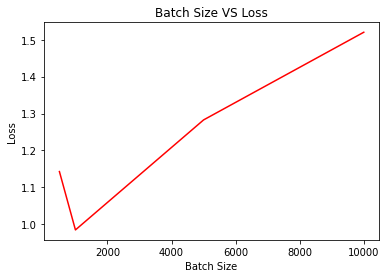

In [77]:
plt.plot(batches,loss,'r')
plt.title("Batch Size VS Loss")
plt.xlabel("Batch Size")
plt.ylabel("Loss")
plt.show()

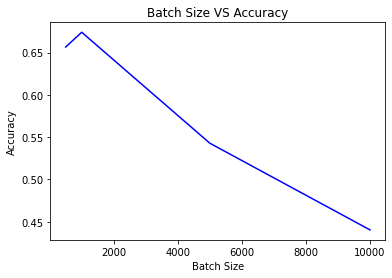

In [78]:
plt.plot(batches,accuracy,'b')
plt.title("Batch Size VS Accuracy")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.show()

3. Try different hyperparameters to obtain the best accuracy on the test set. What is your
best performance and what were the hyperparameters?

The best learning rate that we can find from above experiment is 0.001 and the best batch size would be 1000. Therefore we consyruct a model using this optimized hyperparameter. 

In [79]:
Net = Lenet()
Net.build()
Net.fit(X,y,Epochs= 50,lr= 0.001, batch= 1000,x_val= X_test,y_val=y_test)
l,a = Net.evaluate(X_test,y_test)

Epoch 1/50
49/50 [============================>.] - ETA: 0s - loss: 1.7591 - accuracy: 0.3622

50/50 [==============================] - 2s 41ms/step - loss: 1.7540 - accuracy: 0.3644 - val_loss: 1.4800 - val_accuracy: 0.4669 - lr: 0.0010
Epoch 2/50
49/50 [============================>.] - ETA: 0s - loss: 1.3755 - accuracy: 0.5089

50/50 [==============================] - 2s 35ms/step - loss: 1.3747 - accuracy: 0.5093 - val_loss: 1.3016 - val_accuracy: 0.5311 - lr: 0.0010
Epoch 3/50
49/50 [============================>.] - ETA: 0s - loss: 1.2066 - accuracy: 0.5717

50/50 [==============================] - 2s 35ms/step - loss: 1.2052 - accuracy: 0.5717 - val_loss: 1.1449 - val_accuracy: 0.5955 - lr: 0.0010
Epoch 4/50
49/50 [============================>.] - ETA: 0s - loss: 1.0947 - accuracy: 0.6161

50/50 [==============================] - 2s 35ms/step - loss: 1.0949 - accuracy: 0.6163 - val_loss: 1.0637 - val_accuracy: 0.6305 - lr: 0.0010
Epoch 5/50
49/50 [============================>.] - ETA: 0s - loss: 1.0154 - accuracy: 0.6454

50/50 [==============================] - 2s 35ms/step - loss: 1.0141 - accuracy: 0.6454 - val_loss: 1.0191 - val_accuracy: 0.6448 - lr: 0.0010
Epoch 6/50
49/50 [============================>.] - ETA: 0s - loss: 0.9553 - accuracy: 0.6687

50/50 [==============================] - 2s 35ms/step - loss: 0.9545 - accuracy: 0.6684 - val_loss: 0.9880 - val_accuracy: 0.6584 - lr: 0.0010
Epoch 7/50
49/50 [============================>.] - ETA: 0s - loss: 0.8901 - accuracy: 0.6911

50/50 [==============================] - 2s 35ms/step - loss: 0.8898 - accuracy: 0.6912 - val_loss: 0.9683 - val_accuracy: 0.6636 - lr: 0.0010
Epoch 8/50
49/50 [============================>.] - ETA: 0s - loss: 0.8637 - accuracy: 0.6997

50/50 [==============================] - 2s 35ms/step - loss: 0.8629 - accuracy: 0.6998 - val_loss: 0.9396 - val_accuracy: 0.6732 - lr: 0.0010
Epoch 9/50
49/50 [============================>.] - ETA: 0s - loss: 0.8114 - accuracy: 0.7186

50/50 [==============================] - 2s 35ms/step - loss: 0.8102 - accuracy: 0.7187 - val_loss: 0.9148 - val_accuracy: 0.6867 - lr: 0.0010
Epoch 10/50
49/50 [============================>.] - ETA: 0s - loss: 0.7900 - accuracy: 0.7260

50/50 [==============================] - 2s 35ms/step - loss: 0.7896 - accuracy: 0.7261 - val_loss: 0.9297 - val_accuracy: 0.6790 - lr: 0.0010
Epoch 11/50
49/50 [============================>.] - ETA: 0s - loss: 0.7516 - accuracy: 0.7413

50/50 [==============================] - 2s 35ms/step - loss: 0.7508 - accuracy: 0.7416 - val_loss: 0.8833 - val_accuracy: 0.6999 - lr: 0.0010
Epoch 12/50
49/50 [============================>.] - ETA: 0s - loss: 0.7169 - accuracy: 0.7519

50/50 [==============================] - 2s 35ms/step - loss: 0.7164 - accuracy: 0.7520 - val_loss: 0.8833 - val_accuracy: 0.7014 - lr: 0.0010
Epoch 13/50
49/50 [============================>.] - ETA: 0s - loss: 0.6822 - accuracy: 0.7630

50/50 [==============================] - 2s 35ms/step - loss: 0.6830 - accuracy: 0.7627 - val_loss: 0.8725 - val_accuracy: 0.7049 - lr: 0.0010
Epoch 14/50
49/50 [============================>.] - ETA: 0s - loss: 0.6550 - accuracy: 0.7752

50/50 [==============================] - 2s 35ms/step - loss: 0.6563 - accuracy: 0.7746 - val_loss: 0.8790 - val_accuracy: 0.7043 - lr: 0.0010
Epoch 15/50
49/50 [============================>.] - ETA: 0s - loss: 0.6329 - accuracy: 0.7824

50/50 [==============================] - 2s 35ms/step - loss: 0.6323 - accuracy: 0.7825 - val_loss: 0.8711 - val_accuracy: 0.7051 - lr: 0.0010
Epoch 16/50
49/50 [============================>.] - ETA: 0s - loss: 0.6195 - accuracy: 0.7869

50/50 [==============================] - 2s 36ms/step - loss: 0.6184 - accuracy: 0.7870 - val_loss: 0.8837 - val_accuracy: 0.7031 - lr: 0.0010
Epoch 17/50
49/50 [============================>.] - ETA: 0s - loss: 0.5957 - accuracy: 0.7936

50/50 [==============================] - 2s 35ms/step - loss: 0.5954 - accuracy: 0.7938 - val_loss: 0.8971 - val_accuracy: 0.7001 - lr: 0.0010
Epoch 18/50
49/50 [============================>.] - ETA: 0s - loss: 0.5678 - accuracy: 0.8036

50/50 [==============================] - 2s 35ms/step - loss: 0.5669 - accuracy: 0.8035 - val_loss: 0.8937 - val_accuracy: 0.7079 - lr: 0.0010
Epoch 19/50
49/50 [============================>.] - ETA: 0s - loss: 0.5412 - accuracy: 0.8132

50/50 [==============================] - 2s 35ms/step - loss: 0.5418 - accuracy: 0.8133 - val_loss: 0.8767 - val_accuracy: 0.7106 - lr: 0.0010
Epoch 20/50
49/50 [============================>.] - ETA: 0s - loss: 0.5264 - accuracy: 0.8176

50/50 [==============================] - 2s 35ms/step - loss: 0.5266 - accuracy: 0.8173 - val_loss: 0.8790 - val_accuracy: 0.7152 - lr: 0.0010
Epoch 21/50
49/50 [============================>.] - ETA: 0s - loss: 0.5029 - accuracy: 0.8262

50/50 [==============================] - 2s 35ms/step - loss: 0.5032 - accuracy: 0.8261 - val_loss: 0.9165 - val_accuracy: 0.7038 - lr: 0.0010
Epoch 22/50
49/50 [============================>.] - ETA: 0s - loss: 0.4750 - accuracy: 0.8362

50/50 [==============================] - 2s 35ms/step - loss: 0.4755 - accuracy: 0.8358 - val_loss: 0.9189 - val_accuracy: 0.7080 - lr: 0.0010
Epoch 23/50
49/50 [============================>.] - ETA: 0s - loss: 0.4513 - accuracy: 0.8445

50/50 [==============================] - 2s 35ms/step - loss: 0.4516 - accuracy: 0.8443 - val_loss: 0.9236 - val_accuracy: 0.7107 - lr: 0.0010
Epoch 24/50
49/50 [============================>.] - ETA: 0s - loss: 0.4532 - accuracy: 0.8421

50/50 [==============================] - 2s 35ms/step - loss: 0.4532 - accuracy: 0.8423 - val_loss: 0.9254 - val_accuracy: 0.7066 - lr: 0.0010
Epoch 25/50
49/50 [============================>.] - ETA: 0s - loss: 0.4229 - accuracy: 0.8529

50/50 [==============================] - 2s 36ms/step - loss: 0.4229 - accuracy: 0.8530 - val_loss: 0.9353 - val_accuracy: 0.7144 - lr: 0.0010
Epoch 26/50
49/50 [============================>.] - ETA: 0s - loss: 0.3994 - accuracy: 0.8620

50/50 [==============================] - 2s 36ms/step - loss: 0.3998 - accuracy: 0.8617 - val_loss: 0.9561 - val_accuracy: 0.7129 - lr: 0.0010
Epoch 27/50
49/50 [============================>.] - ETA: 0s - loss: 0.3777 - accuracy: 0.8710

50/50 [==============================] - 2s 35ms/step - loss: 0.3787 - accuracy: 0.8704 - val_loss: 0.9775 - val_accuracy: 0.7080 - lr: 0.0010
Epoch 28/50
49/50 [============================>.] - ETA: 0s - loss: 0.3605 - accuracy: 0.8761

50/50 [==============================] - 2s 35ms/step - loss: 0.3622 - accuracy: 0.8753 - val_loss: 0.9903 - val_accuracy: 0.7091 - lr: 0.0010
Epoch 29/50
49/50 [============================>.] - ETA: 0s - loss: 0.3470 - accuracy: 0.8801

50/50 [==============================] - 2s 35ms/step - loss: 0.3474 - accuracy: 0.8798 - val_loss: 1.0123 - val_accuracy: 0.7056 - lr: 0.0010
Epoch 30/50
49/50 [============================>.] - ETA: 0s - loss: 0.3229 - accuracy: 0.8901

50/50 [==============================] - 2s 35ms/step - loss: 0.3234 - accuracy: 0.8899 - val_loss: 1.0231 - val_accuracy: 0.7078 - lr: 0.0010
Epoch 31/50
49/50 [============================>.] - ETA: 0s - loss: 0.3212 - accuracy: 0.8898

50/50 [==============================] - 2s 35ms/step - loss: 0.3210 - accuracy: 0.8899 - val_loss: 1.0417 - val_accuracy: 0.7056 - lr: 0.0010
Epoch 32/50
49/50 [============================>.] - ETA: 0s - loss: 0.2838 - accuracy: 0.9054

50/50 [==============================] - 2s 35ms/step - loss: 0.2845 - accuracy: 0.9053 - val_loss: 1.0721 - val_accuracy: 0.7086 - lr: 0.0010
Epoch 33/50
49/50 [============================>.] - ETA: 0s - loss: 0.2758 - accuracy: 0.9074

50/50 [==============================] - 2s 35ms/step - loss: 0.2764 - accuracy: 0.9073 - val_loss: 1.1364 - val_accuracy: 0.7016 - lr: 0.0010
Epoch 34/50
49/50 [============================>.] - ETA: 0s - loss: 0.2559 - accuracy: 0.9142

50/50 [==============================] - 2s 35ms/step - loss: 0.2569 - accuracy: 0.9140 - val_loss: 1.1373 - val_accuracy: 0.7070 - lr: 0.0010
Epoch 35/50
49/50 [============================>.] - ETA: 0s - loss: 0.2464 - accuracy: 0.9166

50/50 [==============================] - 2s 35ms/step - loss: 0.2462 - accuracy: 0.9166 - val_loss: 1.1707 - val_accuracy: 0.7009 - lr: 0.0010
Epoch 36/50
49/50 [============================>.] - ETA: 0s - loss: 0.2302 - accuracy: 0.9234

50/50 [==============================] - 2s 35ms/step - loss: 0.2309 - accuracy: 0.9233 - val_loss: 1.2060 - val_accuracy: 0.7045 - lr: 0.0010
Epoch 37/50
49/50 [============================>.] - ETA: 0s - loss: 0.2193 - accuracy: 0.9267

50/50 [==============================] - 2s 35ms/step - loss: 0.2191 - accuracy: 0.9266 - val_loss: 1.2232 - val_accuracy: 0.7061 - lr: 0.0010
Epoch 38/50
49/50 [============================>.] - ETA: 0s - loss: 0.2011 - accuracy: 0.9349

50/50 [==============================] - 2s 35ms/step - loss: 0.2020 - accuracy: 0.9344 - val_loss: 1.2648 - val_accuracy: 0.7033 - lr: 0.0010
Epoch 39/50
49/50 [============================>.] - ETA: 0s - loss: 0.1883 - accuracy: 0.9395

50/50 [==============================] - 2s 35ms/step - loss: 0.1884 - accuracy: 0.9396 - val_loss: 1.2638 - val_accuracy: 0.7084 - lr: 0.0010
Epoch 40/50
49/50 [============================>.] - ETA: 0s - loss: 0.1704 - accuracy: 0.9477

50/50 [==============================] - 2s 35ms/step - loss: 0.1706 - accuracy: 0.9476 - val_loss: 1.3291 - val_accuracy: 0.7028 - lr: 0.0010
Epoch 41/50
49/50 [============================>.] - ETA: 0s - loss: 0.1652 - accuracy: 0.9466

50/50 [==============================] - 2s 35ms/step - loss: 0.1653 - accuracy: 0.9466 - val_loss: 1.4057 - val_accuracy: 0.6931 - lr: 0.0010
Epoch 42/50
49/50 [============================>.] - ETA: 0s - loss: 0.1604 - accuracy: 0.9486

50/50 [==============================] - 2s 35ms/step - loss: 0.1610 - accuracy: 0.9485 - val_loss: 1.4068 - val_accuracy: 0.6970 - lr: 0.0010
Epoch 43/50
49/50 [============================>.] - ETA: 0s - loss: 0.1455 - accuracy: 0.9532

50/50 [==============================] - 2s 35ms/step - loss: 0.1455 - accuracy: 0.9531 - val_loss: 1.4246 - val_accuracy: 0.7091 - lr: 0.0010
Epoch 44/50
49/50 [============================>.] - ETA: 0s - loss: 0.1146 - accuracy: 0.9685

50/50 [==============================] - 2s 35ms/step - loss: 0.1151 - accuracy: 0.9683 - val_loss: 1.4894 - val_accuracy: 0.7009 - lr: 0.0010
Epoch 45/50
49/50 [============================>.] - ETA: 0s - loss: 0.1205 - accuracy: 0.9633

50/50 [==============================] - 2s 35ms/step - loss: 0.1215 - accuracy: 0.9630 - val_loss: 1.5763 - val_accuracy: 0.6920 - lr: 0.0010
Epoch 46/50
49/50 [============================>.] - ETA: 0s - loss: 0.1187 - accuracy: 0.9629

50/50 [==============================] - 2s 35ms/step - loss: 0.1187 - accuracy: 0.9630 - val_loss: 1.5819 - val_accuracy: 0.6932 - lr: 0.0010
Epoch 47/50
49/50 [============================>.] - ETA: 0s - loss: 0.1031 - accuracy: 0.9702

50/50 [==============================] - 2s 35ms/step - loss: 0.1028 - accuracy: 0.9701 - val_loss: 1.5781 - val_accuracy: 0.6992 - lr: 0.0010
Epoch 48/50
49/50 [============================>.] - ETA: 0s - loss: 0.0971 - accuracy: 0.9722

50/50 [==============================] - 2s 35ms/step - loss: 0.0972 - accuracy: 0.9722 - val_loss: 1.6732 - val_accuracy: 0.6931 - lr: 0.0010
Epoch 49/50
49/50 [============================>.] - ETA: 0s - loss: 0.0834 - accuracy: 0.9772

50/50 [==============================] - 2s 35ms/step - loss: 0.0837 - accuracy: 0.9771 - val_loss: 1.7123 - val_accuracy: 0.6946 - lr: 0.0010
Epoch 50/50
49/50 [============================>.] - ETA: 0s - loss: 0.0744 - accuracy: 0.9802

313/313 [==============================] - 1s 3ms/step - loss: 1.7428 - accuracy: 0.6960


For Epochs =50 and using the optimized hyperparameter of batch size =1000 and the learning rate of 0.001. We get the accuracy of the model is 0.70

Feed Forward Network :-

In [80]:
model = Sequential()
model.add(Input(shape=(32,32,3,),name="Input"))
model.add(Flatten())
# 5x5x6 
model.add(Dense(150, activation="relu"))
# 5x5x16  
model.add(Dense(400, activation="relu")) 
# 5x5x120 
model.add(Dense(3000, activation="relu"))  
model.add(Dense(84, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [81]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_35 (Flatten)        (None, 3072)              0         
                                                                 
 dense_76 (Dense)            (None, 150)               460950    
                                                                 
 dense_77 (Dense)            (None, 400)               60400     
                                                                 
 dense_78 (Dense)            (None, 3000)              1203000   
                                                                 
 dense_79 (Dense)            (None, 84)                252084    
                                                                 
 dense_80 (Dense)            (None, 10)                850       
                                                                 
Total params: 1,977,284
Trainable params: 1,977,284
N

In [83]:
# Adam Optimizer and compile
adam = tensorflow.keras.optimizers.Adam(learning_rate= 0.001,beta_1 =0.9)
model.compile(optimizer= adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [84]:
model.fit(X,y,epochs= 25,validation_data=(X_test,y_test),batch_size = 500)

Epoch 1/25
100/100 [==============================] - 2s 11ms/step - loss: 1.7209 - accuracy: 0.3871 - val_loss: 1.5438 - val_accuracy: 0.4625
Epoch 2/25
100/100 [==============================] - 1s 8ms/step - loss: 1.4526 - accuracy: 0.4889 - val_loss: 1.4470 - val_accuracy: 0.4891
Epoch 3/25
100/100 [==============================] - 1s 8ms/step - loss: 1.3121 - accuracy: 0.5374 - val_loss: 1.3898 - val_accuracy: 0.5138
Epoch 4/25
100/100 [==============================] - 1s 8ms/step - loss: 1.1984 - accuracy: 0.5790 - val_loss: 1.3643 - val_accuracy: 0.5185
Epoch 5/25
100/100 [==============================] - 1s 7ms/step - loss: 1.1013 - accuracy: 0.6105 - val_loss: 1.3479 - val_accuracy: 0.5325
Epoch 6/25
100/100 [==============================] - 1s 7ms/step - loss: 0.9958 - accuracy: 0.6472 - val_loss: 1.3894 - val_accuracy: 0.5316
Epoch 7/25
100/100 [==============================] - 1s 7ms/step - loss: 0.8850 - accuracy: 0.6897 - val_loss: 1.4237 - val_accuracy: 0.5355
Epoch

In [85]:
_,accuracy = model.evaluate(X_test,y_test)
print("Accuracy of the model is : {0}".format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 3.5977 - accuracy: 0.5204
Accuracy of the model is : 0.5203999876976013


4.a What is its performance?

Accuracy model is 0.52

The Feed Forward model has less accuracy than the LeNet model that is 0.701. The LeNet performs  better than the FFM. 

4.b How many parameters are there in this network compared to the LeNet
implementation? Are they worth it?

The number of paramters in Feed Forward model are 1977284 while the parameters in the LeNet are 256830. As we can see that LeNEt performs better than Feed Forward network therefore we can say that they are not worth it. 